- **Import Packages:**

In [1]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt
import os
import scipy
import pandas as pd
import matplotlib.colors
from matplotlib import cm

<h1>Goal for the day: <br/>Use loops and if statements to manipulate a 10-minutely dataset to give hourly outputs!

Reminder:
<br/><font color='blue'>* Blue text indicates activities that you should complete as a student
<br/><font color='red'>* Red text indicates extra challenge questions

<h2> 1. Intro to 'if' statements

We can use an 'if' statement to test whether a condition is true and follow a procedure in the event that the condition is true.

In [2]:
#Example of using 'if' statements
a=33
b=33

if b==a:
    print('b equals a')

b equals a


We can use 'if', 'elif' [stands for else if], and 'else' statements to test multiple conditions. You can add as many 'elif' statements as needed, but must begin the series of statements with an 'if' statement.

In [3]:
#Example of using 'if' statements considering three cases
a=34
b=33

if a>b:
    print('a is greater than b')
elif a<b:
    print('a is less than b')
else:
    print('a is equal to b')

a is greater than b


<font color='blue'> List all the things you notice must be included in the if statement structure

1. if condition
2. colon after if statement
3. enter and indentation for 'thing we want done'

There are a whole bunch of logic statements we can use to write an if statement:
* **equals**: a == b
* **not equals**: a != b
* **less than**: a < b
* **less than or equal to**: a <= b
* **greater than**: a > b
* **greater than or equal to**: a >= b
* more options [at this link](https://www.geeksforgeeks.org/python-logical-operators-with-examples-improvement-needed/)

<font color='blue'> Spend 3 minutes writing your own unique if statement using at least two of the following variables

In [4]:
a=29
b=90
c=29

if b > a:
    print('b is greater than a')
    
    if b > c:
        print('b is greater than a and c')
    
    else: print('b is less than or equal to c')
    
else:
    print('b is less than or equal to a')

b is greater than a
b is greater than a and c


**Advanced!** We can check multiple conditions simultaneously using nested if statements.

In [5]:
fruit1 = 'orange'
fruit2 = 'orange'
fruit3 = 'pear'

if fruit1 == fruit2:
    if fruit2 == fruit3:
        print ('Fruit 2 and Fruit 3 are the same.')
    else:
        print('Fruit 2 and Fruit 3 are not the same.')

Fruit 2 and Fruit 3 are not the same.


<h2> 2. Intro to for loops 

In [6]:
import numpy as np

#Make a numpy array of fruit names
a=np.array(['apple','orange','pear','watermelon','grapes'])

for i in a:
    print('The value in this spot is '+str(i))

The value in this spot is apple
The value in this spot is orange
The value in this spot is pear
The value in this spot is watermelon
The value in this spot is grapes


When we work with data, we often want to loop through each index of an array as opposed to each value of an array. 
<br><br>Instead of writing:
<code> for i in a: </code>
<br> Where the i values are: apple, orange, pear, watermelon, grapes
<br>
<br>We write:
<code> for i in range(len(a)): </code>
<br> Then the i values are: 0,1,2,3,4 

**Note that the range() function starts counting from 0.*

In [7]:
#Make a numpy array of values
a=np.array(['apple','orange','pear','watermelon','grapes'])

#REMINDER: most functions that create lists/arrays in Python are non-inclusive. range() outputs an array
#with values from 0 to len(a), not including len(a).
for i in range(len(a)): 
    print('The value at index '+str(i)+' is '+str(a[i]))

The value at index 0 is apple
The value at index 1 is orange
The value at index 2 is pear
The value at index 3 is watermelon
The value at index 4 is grapes


In [8]:
a[1]

'orange'

In [9]:
#Suppose we want to exclude the last element in the array when printing out the array values
#We can stop the count output by the range() function one index earlier

#Make a numpy array of values
a=np.array(['apple','orange','pear','watermelon','grapes'])

for i in range(len(a)-1): 
    print('The value at index '+str(i)+' is '+str(a[i]))

The value at index 0 is apple
The value at index 1 is orange
The value at index 2 is pear
The value at index 3 is watermelon


<h2><font color=blue> Try to tackle the next two challenges over the next 5 minutes.

In [10]:
a=np.array([4,5,20,7,25,15,9,10])

<font color='blue'> Using the code above, write a for loop that prints out the value multiplied by 2 for each value in the array

In [11]:
for i in a:
    print(i*2)

8
10
40
14
50
30
18
20


<font color='red'> Write code that will print out the value in the array only if (*hint*) that value multiplied by 2 is 30. 

In [12]:
for i in a:
    if (i*2==30):
        print(i)

15


<h2>3. Let's look at some real data!


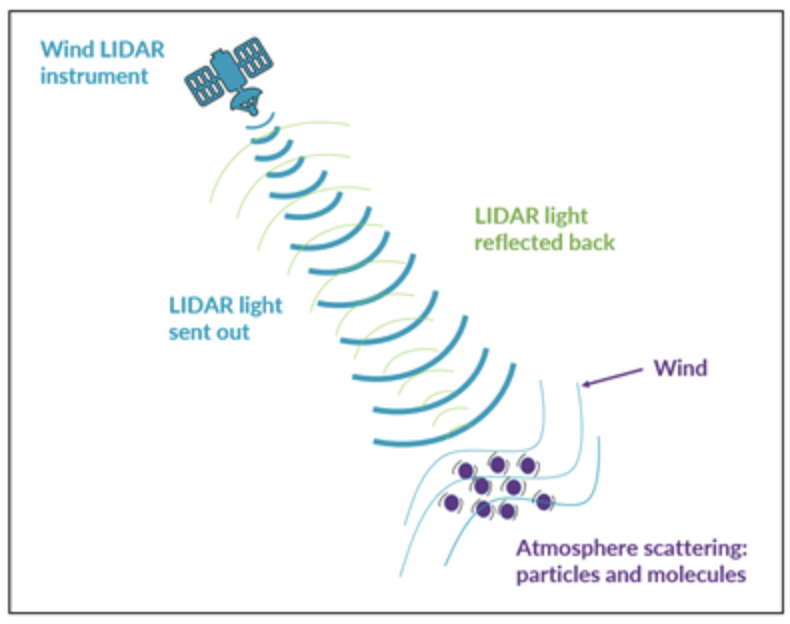

In [13]:
#Uploading data-don't need to worry about how to write any of this code yet!
lidar_winds = pd.read_csv('lidar_winds_short.csv')
lidar_winds['timestamp'] = pd.to_datetime(lidar_winds['timestamp'])

# Separate our year, month, day, time
lidar_winds['Year'] = pd.DatetimeIndex(lidar_winds['timestamp']).year
lidar_winds['Month'] = pd.DatetimeIndex(lidar_winds['timestamp']).month
lidar_winds['Day'] = pd.DatetimeIndex(lidar_winds['timestamp']).day
lidar_winds['Time'] = pd.DatetimeIndex(lidar_winds['timestamp']).time

# Create numpy arrays of values from dataarray
wind18m = np.asarray(lidar_winds['wspd18m'])
year = np.asarray(lidar_winds['Year'])
month = np.asarray(lidar_winds['Month'])
day = np.asarray(lidar_winds['Day'])
time = np.asarray(lidar_winds['Time'])

For every record in the lidar data we are working with, we have a time of the data record (stored in the timestamp array) and a windspeed for the data record (stored in the wind18m array). We've also extracted from the timestamp array the year, month, day, and time of each record. Let's investigate what this data looks like!

In [14]:
wind18m.shape

(84396,)

<font color ='blue'> What does this tell us about our wind18m array?

Our array contains 84,396 rows of data. 

In [15]:
print(wind18m[0:4])

[7.2923 7.8613 7.7594 7.4891]


<font color ='blue'> What does this tell us about our wind18m array?

This shows us the first 4 entries in our wind data.

In [16]:
print(year[0], month[0], day[0], time[0])
print(year[-1], month[-1], day[-1], time[-1])

2019 8 12 00:00:00
2021 3 21 23:50:00


<font color ='blue'> What does this tell us about our data?

This shows us the first and last times of the data entries. 

In [17]:
#Note: the functions np.nanmin() and np.nanmax(), perform the same operation as np.min() and np.max(), 
#except they do so while ignoring any empty entries in the data. These empty entries would be represented 
#with the value of NaN, which stands for "Not a Number".
print(np.nanmin(wind18m))
print(np.nanmax(wind18m))

0.5016
26.8913


<font color ='blue'> What does this tell us about our wind18m array?

Maximum and minimum wind speeds out of all of our data. 

<h2> Let's see how we can retrieve hourly wind data only from June 2020.

<h2><font color=blue> In the following code, after every # symbol, explain in your own words what the next line(s) of code are doing (take 20 minutes to do this).

In [18]:
#Let the variable num_times represent the number of times we have in our data 
num_times=len(wind18m)

#Initialize empty numpy arrays to store the date, time, and wind speed for days in June 2020
day_06_2020 = np.array([])
time_06_2020 = np.array([])
wind_06_2020 = np.array([])

#For a range of consecutive values from zero to the number of values in the wind array, do the following
for i in range(num_times):
    
    #Save the information we need for the next steps of the loop into variables
    year_i = year[i]
    month_i = month[i]
    day_i = day[i]
    time_i = time[i]
    wdsp = wind18m[i]
    
    #If the year is 2020 and the month is June, then do the following
    if year_i ==2020 and month_i == 6:
        #
        day_06_2020 = np.append(day_06_2020,day_i)
        time_06_2020 = np.append(time_06_2020,time_i)
        wind_06_2020 = np.append(wind_06_2020,wdsp)

        
#Initialize new arrays to store the hourly-averaged wind speed and the day/hour corresponding
#to this average. The day/hour will act as our x while hourly-averaged wind speed acts as our
#y for a y vs x plot.
day_hour_06_2020 = np.array([])
hourly_wind_06_2020 = np.array([])

#Let this variable represent the number of times we have in our data from June 2020
num_times_06_2020 = len(wind_06_2020)
    
#For a range of consecutive values from zero to the total number of hourly timesteps in June 2020 
#(the number of 10 minutely timesteps divided by 6, since there are six 10-minute intervals in an hour)
for j in range(int(num_times_06_2020/6)):
    
    #Make a separate counter k, which counts through all of the 10-minutely June 2020 timesteps in each hour
    k=j*6
    
    #Make a new string day_hour that stores both the day and hour of the hour-averaged wind speed
    day_hour = str(day_06_2020[k]) + ' ' + str(time_06_2020[k])
    
    #Calculate the wind speed for this hour as the average wind speed across the the k, k+1, k+2,...,k+5 
    #timesteps of the 10 minute data
    hourly_wdsp = np.nanmean(wind_06_2020[k:k+6]) # note np.nanmean() is the same as np.mean() except it ignores missing data that is converted to "NaN" or "Not a Number"
    
    #Save the day/hour string constructed above and the average of wind speed found for the current hour
    #into our new arrays
    day_hour_06_2020 = np.append(day_hour_06_2020, day_hour)
    hourly_wind_06_2020 = np.append(hourly_wind_06_2020, hourly_wdsp)
    

<h2><font color=blue> Once you've finished explaining the above block of code, run the code to obtain hourly_wind_06_2020. Explain in words what the resulting array hourly_wind_06_2020 is. 

hourly_wind_06_2020 contains hour-averaged wind speeds for all hours in June 2020.

<font color=red> Plot wind_06_2020 with time on the x axis and 18m wind speed on the y axis.

<font color=red> Copy and paste the code above, then edit the loops to make them faster or use fewer lines.

<h2> 4. We can visualize our hourly wind data using Matplotlib to plot:

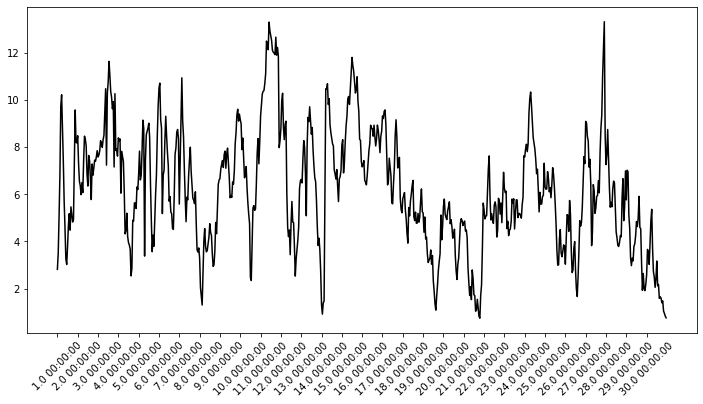

In [19]:
#Create the figure
fig=plt.figure(figsize=(12,6))

#add one subplot to figure
ax= fig.add_subplot(1, 1, 1)

#Plot time on the x axis, wind on the y
plt.plot(day_hour_06_2020, hourly_wind_06_2020, color='black')

#Only label every 24 ticks (daily), otherwise it gets too crowded
ax.set_xticks(ax.get_xticks()[::24])
#Rotate tick labels for better spacing/viewing
ax.tick_params(axis='x', rotation=45)


plt.show()

<font color='blue'> <h2> The code for the above image has been copied and pasted below. 

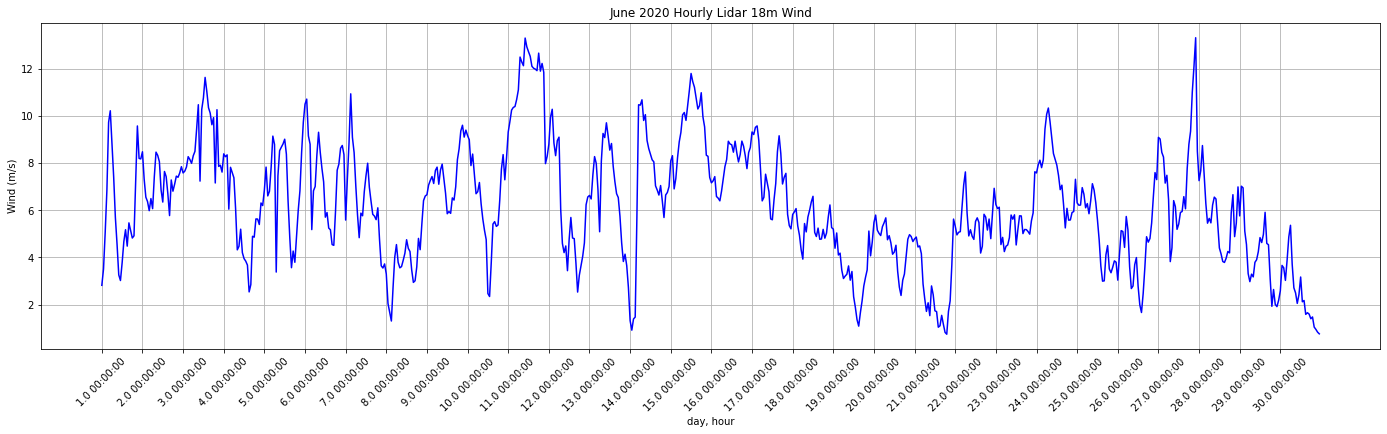

In [31]:
#Create the figure
fig=plt.figure(figsize=(24,6))  ## change the plot size

#add one subplot to figure
ax= fig.add_subplot(1, 1, 1)

#Plot time on the x axis, wind on the y
plt.plot(day_hour_06_2020, hourly_wind_06_2020, color='blue')

#Only label every 24 ticks (daily), otherwise it gets too crowded
ax.set_xticks(ax.get_xticks()[::24])
#Rotate tick labels for better spacing/viewing
ax.tick_params(axis='x', rotation=45)

# Add a title
ax.set_title('June 2020 Hourly Lidar 18m Wind')

# Add x axis and y axis labels
ax.set_ylabel('Wind (m/s)')
ax.set_xlabel('day, hour')

# Add gridlines
ax.grid()

plt.show()

<font color='blue'> <h2> Edit/add to the code above so that the output matches the image below it.
    <br/> Hint: googling Matplotlib + whatever you want to do is a great tool for this challenge.
    <br/>You can also look at official documentation: https://matplotlib.org/
    <br/> <font color='red'> Add a trend line or anything else you think may improve this graph!

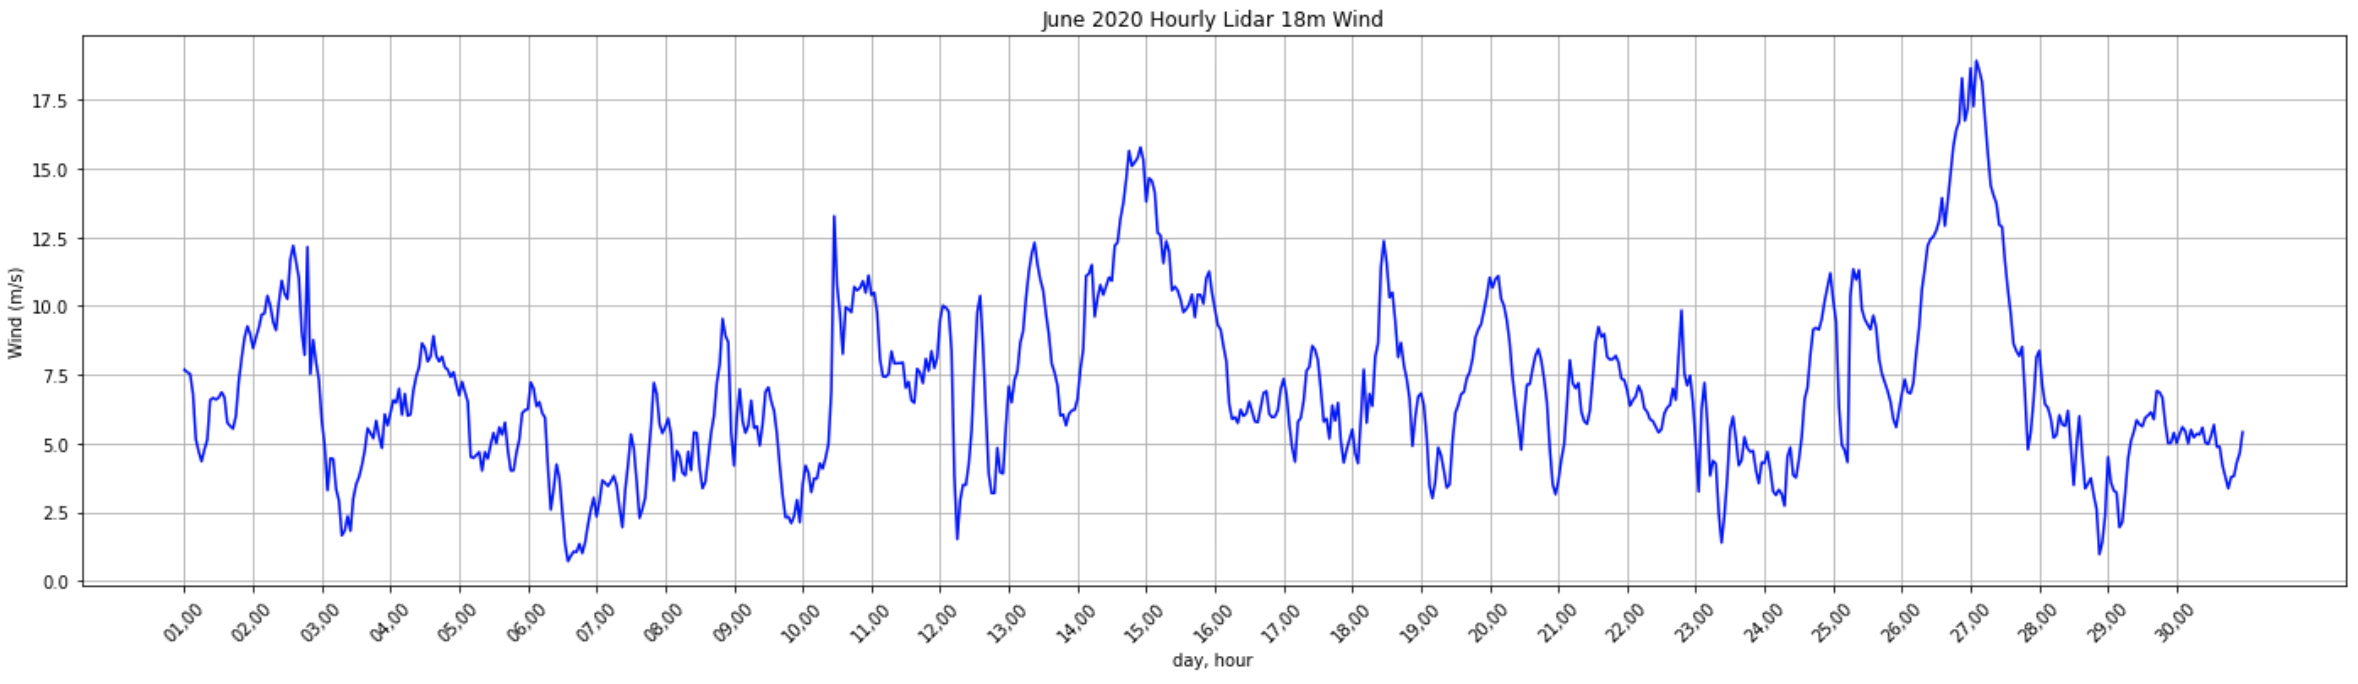

In [21]:
#Extra topics
# (1) Introduce stepping in indexing of arrays